# Auto Arima on HBL 2
## this is the first notebook of Auto arima stock prices where i have done just for single company to check the model performance.

In [1]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
#data set load
df=pd.read_csv('C:/Users/Abubakar/Desktop/Desktop Docs/PSX/HBL.csv')

In [3]:
df.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,HBL,16-Jul-2007,350.00,375.00,350.00,355.00,2975400
1,HBL,17-Jul-2007,357.60,359.85,337.25,341.40,2420100
2,HBL,18-Jul-2007,334.50,336.95,324.35,324.35,2029100
3,HBL,19-Jul-2007,321.00,322.90,308.15,308.50,2176800
4,HBL,20-Jul-2007,305.05,319.00,305.00,317.30,2019600


In [4]:
#Open Prices
print(df.head())
print(df.shape)
print(df.columns)

  Symbol         Date    Open    High     Low   Close   Volume
0    HBL  16-Jul-2007  350.00  375.00  350.00  355.00  2975400
1    HBL  17-Jul-2007  357.60  359.85  337.25  341.40  2420100
2    HBL  18-Jul-2007  334.50  336.95  324.35  324.35  2029100
3    HBL  19-Jul-2007  321.00  322.90  308.15  308.50  2176800
4    HBL  20-Jul-2007  305.05  319.00  305.00  317.30  2019600
(2948, 7)
Index(['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


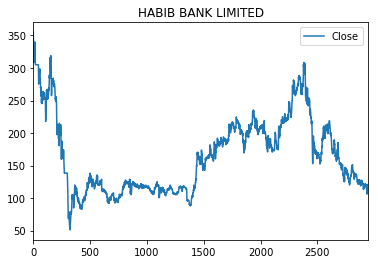

In [5]:
#close prices Visualizes
df[['Close']].plot()
plt.title("HABIB BANK LIMITED")
plt.show()

In [6]:
df['Date'][2947]

'30-Aug-2019'

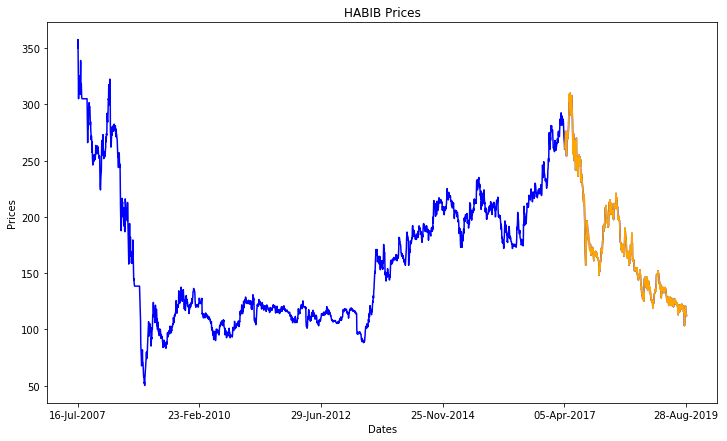

In [7]:
#Dividing dataset into train and testing and visualizing them
trainData, testData = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('HABIB Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(testData['Open'], 'Orange', label='Testing Data')
plt.xticks(np.arange(0,len(df)-1, len(testData)-1), df['Date'][0:len(df)-1:len(testData)-1])
plt.show()

In [8]:
#mean of values
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [9]:
training = trainData['Open'].values
test_ar = testData['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
psthist = [x for x in training]
print(type(psthist))
predicted = list()
for t in range(len(test_ar)):
    model = ARIMA(psthist, order=(5,1,0))#p(AR)=5, d(I)=1, q(MA)=0
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predicted.append(yhat)
    obs = test_ar[t]
    psthist.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
err = mean_squared_error(test_ar, predicted)
print('Testing Mean Squared err: %.3f' % err)
err2 = smape_kun(test_ar, predicted)
print('Symmetric mean absolute percentage err: %.3f' % err2)

<class 'list'>
Testing Mean Squared err: 18.119
Symmetric mean absolute percentage err: 28.738


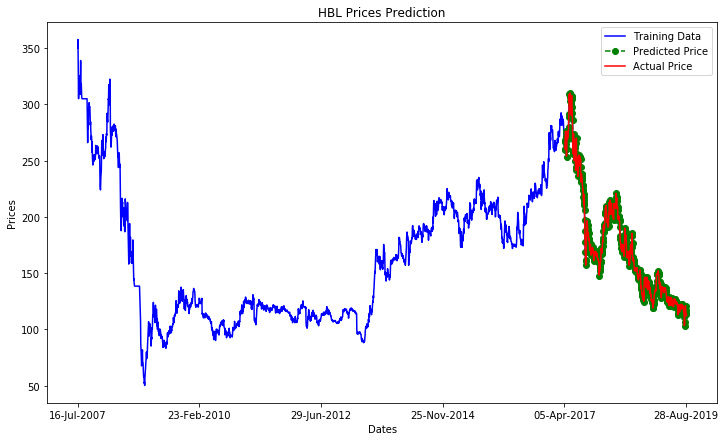

In [10]:
#plotting predictions
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(testData.index, predicted, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(testData.index, testData['Open'], color='red', label='Actual Price')
plt.title('HBL Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(df)-1, len(testData)-1), df['Date'][0:len(df)-1:len(testData)-1])
plt.legend()
plt.show()

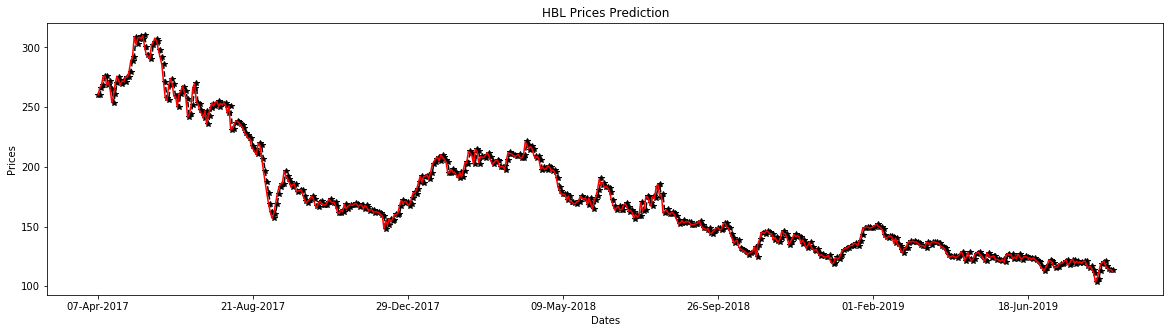

In [11]:
plt.figure(figsize=(20,5))
plt.plot(testData.index, predicted, color='black', marker='*', linestyle='dashed', 
         label='Predicted Price')
plt.plot(testData.index, testData['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(2358,2947, 90), df['Date'][2358:2947:90])
plt.title('HBL Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()

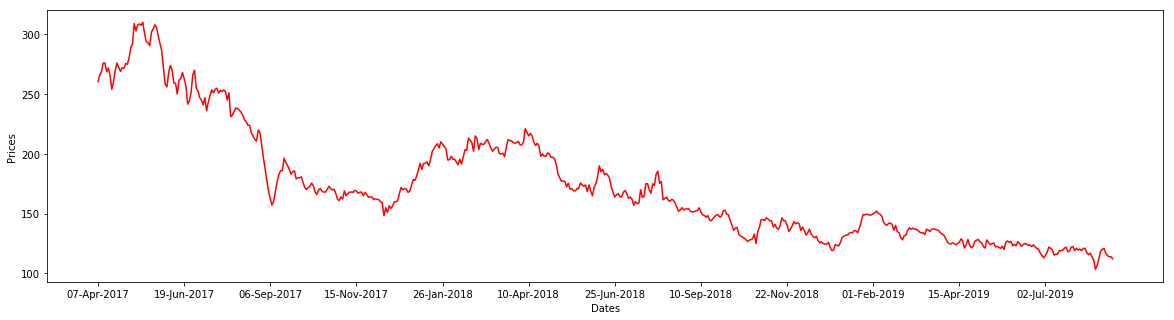

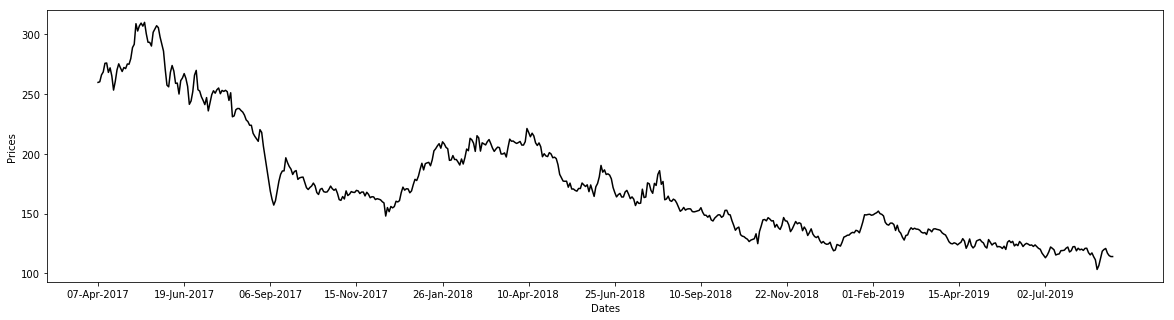

In [12]:
plt.figure(figsize=(20,5))
plt.plot(testData.index, testData['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(2358,2947, 50), df['Date'][2358:2947:50])
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(testData.index, predicted, color='black', label='Predicted Price')
plt.xticks(np.arange(2358,2947, 50), df['Date'][2358:2947:50])
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()
